# Subject : Data Analysis for SportsStats

# Milestone1 Project Proposal

### Description

This is a capstone project in an online data science major.

### Client :

“SportsStats” is a sports analysis firm partnering with local news and elite personal trainers to provide  interesting” insights to help their partners. 

The goal of this project is to explore and analyse the data about Olympic events and competitors and try to find “interesting” insights to help their partners. Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights. The findings might interest also fans of Olympic games, sport commentators, trainers and news firms. 

The subject is chosen because of the size of data files witch can be handled easily and also because I am a fun of sport in general.


### Inputs:

We have two csv files as input.

● The “athlete_events.csv” file contains information on the athletes and the events where they participated as well as their result.

● The “noc_regions.csv contains the country and the National Olympic Committee code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

data = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

## Data exploration

In [4]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
region.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [3]:
region[region['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [4]:
region.loc[[168,208,213],'region'] = list(region.loc[[168,208,213],'notes'])

In [86]:
data[data['NOC']=='UNK']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
61080,31292,Fritz Eccard,M,nan,nan,nan,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
130721,65813,A. Laffen,M,nan,nan,nan,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


In [12]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  230 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [13]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9472
Height     60169
Weight     62873
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231331
dtype: int64

There is missing values in the columns 'Age', 'Height', 'Weight' and 'Medal'.

The first three columns can be used in the analysis by just neglect the missing values. But for the last one, there is sense for a missing value in the 'Medal', it just tell the competetor did't win anything.
 

In [14]:
print(data['Year'].min())
print(data['Year'].max())

1896
2016


In [43]:
# How many total sports and events
print(f"Total number of sport in data : {len(data.Sport.unique())}")
print(f"Total number of sport in data : {len(data.Event.unique())}")

# all Summer sports of the final edition in data
print(f"\n\nSummer sport\'s of 2016 : {len(data[(data['Season']=='Summer') & (data['Year']== 2016)].Sport.unique())}")
print(f"Summer event\'s of 2016 : {len(data[(data['Season']=='Summer') & (data['Year']== 2016)].Event.unique())}")
print(f"Summer sport\'s of 2016 :\n {sorted(data[(data['Season']=='Summer') & (data['Year']== 2016)].Sport.unique())}")

# all Winter sports of the final edition in data
print(f"\n\nwinter sport\'s of 2014 : {len(data[(data['Season']=='Winter') & (data['Year']== 2014)].Sport.unique())}")
print(f"winter event\'s of 2014 : {len(data[(data['Season']=='Winter') & (data['Year']== 2014)].Event.unique())}")
print(f"winter sport\'s of 2014 :\n {sorted(data[(data['Season']=='Winter') & (data['Year']== 2014)].Sport.unique())}")


Total number of sport in data : 66
Total number of sport in data : 765


Summer sport's of 2016 : 34
Summer event's of 2016 : 306
Summer sport's of 2016 :
 ['Archery', 'Athletics', 'Badminton', 'Basketball', 'Beach Volleyball', 'Boxing', 'Canoeing', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Judo', 'Modern Pentathlon', 'Rhythmic Gymnastics', 'Rowing', 'Rugby Sevens', 'Sailing', 'Shooting', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling']


winter sport's of 2014 : 15
winter event's of 2014 : 98
winter sport's of 2014 :
 ['Alpine Skiing', 'Biathlon', 'Bobsleigh', 'Cross Country Skiing', 'Curling', 'Figure Skating', 'Freestyle Skiing', 'Ice Hockey', 'Luge', 'Nordic Combined', 'Short Track Speed Skating', 'Skeleton', 'Ski Jumping', 'Snowboarding', 'Speed Skating']


In [15]:
for frame, group in data.groupby('Games'):
    if len(group['City'].unique()) != 1:
        print(frame, group['City'].unique())

1956 Summer ['Melbourne' 'Stockholm']


In [38]:
data[(data['City']=='Stockholm') & (data['Year']==1956)].Sport.unique()

array(['Equestrianism'], dtype=object)

In 1956, Sweden hold just one event "Equestrianism". 
Then Olympic Games can be held in more than one city

In [16]:
data[(data['Event'] == 'Speed Skating Women\'s 500 metres') & (data['Year'] == 2010)].Age.unique()

array([17., 26., 18., 24., 20., 21., 27., 31., 23., 32., 38., 30., 25.,
       33., 34., 22.])

then the competetors in the same event at the same game may have diffrent age

In [5]:
# I noticed that for Singapore the NOC used in data is "SGP", wherase 'SIN' is used in the region file. 
# So before the merge I'll change it in the region dataframe
region.loc[region[region['NOC']=='SIN'].index,'NOC']= 'SGP'
# I'll drop two rows where the National Olympic Code is UNK (unkown)
data = data.drop(data[data['NOC']=='UNK'].index)

In [6]:
# I will mergre the two dataframes to have the country
alldata = pd.merge(data, region, how='left', on = 'NOC')
data_without_null = data.dropna( how='any',subset=['Height', 'Weight', 'Age'])
# summerData = pysqldf(""" SELECT * FROM alldata WHERE Season = 'Summer' """)
# winterData = pysqldf(""" SELECT * FROM alldata WHERE Season = 'Winter' """)

## Entity-Relationship Diagramm
After a this exploration of data, the suggested modelization is shown by the erd bellow.

![ERD](ERD.png)

In this Project, i am asked to provide some data analytics guidance for a client by preparing a project proposal detailing: 
The questions I am wanting to answer, initial hypothesis about the data relationships, and the approach I will take to get your answers. 

## Questions
#### Q1 : Does the country known for a sport is the most medal wining?
- Football : What country is most medal-winning? is it Brazil or German?
- Basketball : What country is most medal-winning? is it the USA?

#### Q2 : Is there any relation between organizing the Olympic and being the country most medal-wining?
#### Q3 : Does the age of the competitor in an individual contest affect the result?
#### Q4 :Is there any correlation between the performance of a country in winter season and that in summer?

## Hypothesis
#### H1 : Brazil, German must be countries most medal-winning of football events and the USA for basketball through the history of the Olympics. 

#### H2 : The country organizing the Olympic is the he most medal-wining

#### H3 : The winners of an individual contest must be around the average age of all competitors

#### H4 : I think that yes there is a correlation between performance in the seasons

## Approach
#### A1 : Rank countries wining the olympics for two spors : football and Basketball
- Consider the total number of medals not just Gold which means the country is at least in the 3 finalists

#### A2 : See if yes or no the country holding the olympics is within the 3 most medal winning countries

#### A3 : See if yes or no the age of winner is within the avrage+/-1std (I’ll neglect the missing values)

#### A4 : Pick three countries and see the relation between their performance in winter and summer

# Milestone2 : Data Understanding & Descriptive Stats

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## How many Summer/Winter Seasons ? What years?

In [14]:
print(f"""
There is {len(data[data['Season']=='Winter'].Year.unique())} winter olympic Games.
\nThey are hold in this yers \n{sorted(data[data['Season']=='Winter'].Year.unique())}
      """)


There is 22 winter olympic Games.

They are hold in this yers 
[1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014]
      


In [15]:
print(f"""
There is {len(data[data['Season']=='Summer'].Year.unique())} summer olympic Games.
\nThey are hold in this yers \n{sorted(data[data['Season']=='Summer'].Year.unique())}
      """)


There is 29 summer olympic Games.

They are hold in this yers 
[1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
      


## Evolution of sport, events, number of athletes, female/male ratio over the years for each season ?

In [13]:
SportSummer=pysqldf("""
    SELECT Year, COUNT(Distinct Sport) AS nbrSummerSport
      FROM alldata
      WHERE Season = 'Summer'
      GROUP BY Year
      ORDER BY Year
 """)
SportWinter=pysqldf("""
    SELECT Year, COUNT(Distinct Sport) AS nbrWinterSport
      FROM alldata
      WHERE Season = 'Winter'
      GROUP BY Year
      ORDER BY Year
 """)
# ******************************************************************************************
EventsAthelete=pysqldf("""
    SELECT Year, COUNT(Distinct Event) AS nbrAthleticsEvent
      FROM alldata
      WHERE Sport = 'Athletics'
      GROUP BY Year
      ORDER BY Year
 """)
# ******************************************************************************************
Athelet_s = pysqldf("""
SELECT Year, 
    MAX(CASE WHEN Sex = 'M' THEN nbrAthlets ELSE 0 END) AS 'NbrMale',
    MAX(CASE WHEN Sex = 'F' THEN nbrAthlets ELSE 0 END) AS 'NbrFemale'
    FROM
    (
    SELECT Year, Sex, COUNT(Distinct ID) AS nbrAthlets
      FROM alldata
      Where Season = 'Summer'
      GROUP BY Year, Sex
      ORDER BY Year
      )
      GROUP BY Year
 """)
Athelet_w = pysqldf("""
SELECT Year, 
    MAX(CASE WHEN Sex = 'M' THEN nbrAthlets ELSE 0 END) AS 'NbrMale',
    MAX(CASE WHEN Sex = 'F' THEN nbrAthlets ELSE 0 END) AS 'NbrFemale'
    FROM
    (
    SELECT Year, Sex, COUNT(Distinct ID) AS nbrAthlets
      FROM alldata
      Where Season = 'Winter'
      GROUP BY Year, Sex
      ORDER BY Year
      )
      GROUP BY Year
 """)

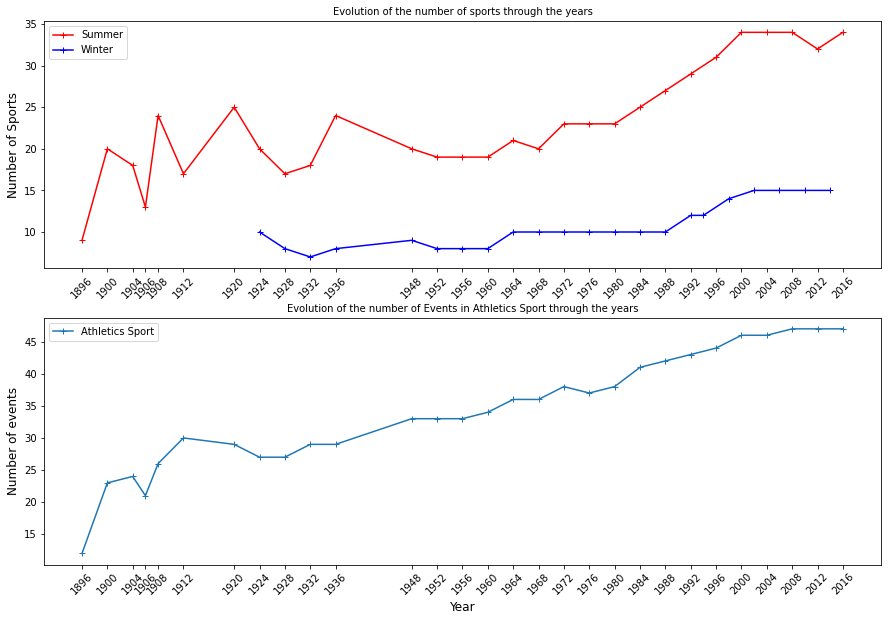

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(SportSummer.Year, SportSummer.nbrSummerSport, '-+',  c='r', label = 'Summer');
plt.plot(SportWinter.Year, SportWinter.nbrWinterSport, '-+' , c='b', label = 'Winter');
plt.ylabel('Number of Sports', fontsize=12);
plt.xticks(Athelet_s.Year, Athelet_s.Year, rotation=45);
plt.title('Evolution of the number of sports through the years', fontsize=10);
plt.legend();

plt.subplot(2, 1, 2)
plt.plot(EventsAthelete.Year, EventsAthelete.nbrAthleticsEvent, '-+',label='Athletics Sport');
plt.xlabel('Year', fontsize=12);
plt.ylabel('Number of events', fontsize=12);
plt.title('Evolution of the number of Events in Athletics Sport through the years', fontsize=10);
plt.xticks(Athelet_s.Year, Athelet_s.Year, rotation=45);
plt.legend();

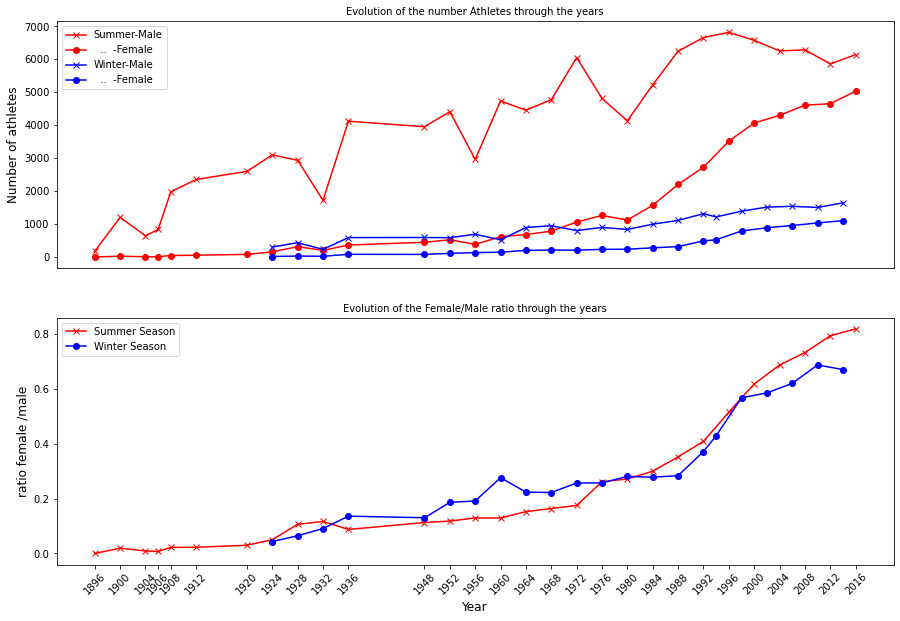

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(Athelet_s.Year, Athelet_s.NbrMale, '-x',   c='r', label = 'Summer-Male');
plt.plot(Athelet_s.Year, Athelet_s.NbrFemale, '-o', c='r', label = '  ..  -Female');
plt.plot(Athelet_w.Year, Athelet_w.NbrMale, '-x',   c='b', label = 'Winter-Male');
plt.plot(Athelet_w.Year, Athelet_w.NbrFemale, '-o' ,c='b', label = '  ..  -Female');
plt.ylabel('Number of athletes', fontsize=12);
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Evolution of the number Athletes through the years', fontsize=10);
plt.legend();

plt.subplot(2, 1, 2)
plt.plot(Athelet_s.Year, Athelet_s.NbrFemale/Athelet_s.NbrMale, '-x',c='r',label='Summer Season');
plt.plot(Athelet_w.Year, Athelet_w.NbrFemale/Athelet_w.NbrMale, '-o',c='b',label='Winter Season');
plt.xlabel('Year', fontsize=12);
plt.ylabel('ratio female /male', fontsize=12);
plt.xticks(Athelet_s.Year, Athelet_s.Year, rotation=45);
plt.title('Evolution of the Female/Male ratio through the years', fontsize=10);
plt.legend();

## What countries have host the most Olympic Games?
First, i'll bring a table form wikipidia contining the host countries of the olympic games

In [108]:
link = "https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities"

host = pd.read_html(link,header=0)[2].loc[0:54,['City.1','Year','Country','Continent']]

host.rename({'City.1':'City','Country':'Host country', 'Continent':'Host continent'}, axis=1, inplace=True)

host.drop([5,15,16,17,18], inplace=True)

host.replace(['United States','United Kingdom','Australia\xa0Sweden','OceaniaEurope','Soviet Union','West Germany']
                            ,['USA','UK','Australia','Oceania','Russia','Germany'], inplace=True)
df=pd.DataFrame([{'City': 'Athens','Year': 1906, 'Host country': 'Greece', 'Host continent':'Europe'},
                 {'City': 'Stockholm','Year': 1956, 'Host country': 'Sweden', 'Host continent':'Europe'}])
# The 1906 Intercalated Games are no longer officially recognized by the IOC as an official Olympic Games.


host=host.append(df)
def splitname(row):
    row['City'] = row['City'].split("[")[0]
    row['Host continent'] = row['Host continent'].split("[")[0]
    return row

host=host.apply(splitname, axis='columns')
host['City'].replace(['Athens','Rome', 'St. Moritz','Antwerp','Turin','MelbourneStockholm','Moscow']
                     ,['Athina','Roma','Sankt Moritz','Antwerpen','Torino','Melbourne','Moskva'], inplace=True)
host.sort_values('Year', inplace=True)
host.index = pd.RangeIndex(len(host.index))
host

,City,Year,Host country,Host continent
0,Athina,1896,Greece,Europe
1,Paris,1900,France,Europe
2,St. Louis,1904,USA,America
3,Athina,1906,Greece,Europe
4,London,1908,UK,Europe
5,Stockholm,1912,Sweden,Europe
6,Antwerpen,1920,Belgium,Europe
7,Chamonix,1924,France,Europe
8,Paris,1924,France,Europe
9,Sankt Moritz,1928,Switzerland,Europe


In [109]:
alldata_ = pd.merge(alldata, host, how='left', on=['City','Year'])

In [110]:
HostingCounty=pysqldf("""
SELECT `Host country`, count(*) AS Times
  FROM
    (
    SELECT Year, City, Season, `Host country`, `Host continent`
    FROM alldata_
    GROUP BY Year, Season
    )
  GROUP BY `Host country`
  ORDER BY Times DESC
""")
HostingContinent=pysqldf("""
SELECT `Host continent`, count(*) AS Times
  FROM
    (
    SELECT Year, City, Season, `Host country`, `Host continent`
    FROM alldata_
    GROUP BY Year, Season
    )
  GROUP BY `Host continent`
  ORDER BY Times DESC
""")
HostingCounty

,Host country,Times
0,USA,8
1,France,5
2,UK,3
3,Japan,3
4,Italy,3
5,Greece,3
6,Germany,3
7,Canada,3
8,Switzerland,2
9,Russia,2


In [11]:
HostingContinent

,Host continent,Times
0,Europe,31
1,America,13
2,Asia,5
3,Oceania,2


No handles with labels found to put in legend.


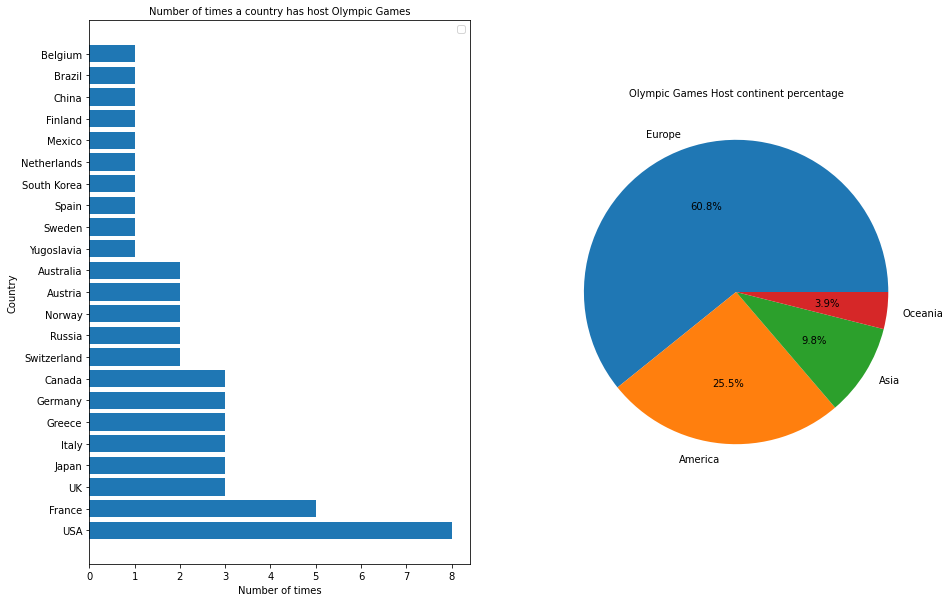

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.barh(HostingCounty['Host country'],HostingCounty['Times'])
plt.ylabel('Country', fontsize=10);
plt.xlabel('Number of times', fontsize=10);
plt.title('Number of times a country has host Olympic Games', fontsize=10);
plt.legend();

plt.subplot(1, 2, 2)
plt.pie(HostingContinent['Times'], labels = HostingContinent['Host continent'],autopct='%1.1f%%');
plt.title('Olympic Games Host continent percentage', fontsize=10);

## Descriptive stats:
I will begin by using the describe()

In [93]:
data_without_null.describe()

,ID,Age,Height,Weight,Year
count,206165.00,206165.00,206165.00,206165.00,206165.00
mean,68616.02,25.06,175.37,70.69,1989.67
std,38996.51,5.48,10.55,14.34,20.13
min,1.00,11.00,127.00,25.00,1896.00
25%,35194.00,21.00,168.00,60.00,1976.00
50%,68629.00,24.00,175.00,70.00,1992.00
75%,102313.00,28.00,183.00,79.00,2006.00
max,135571.00,71.00,226.00,214.00,2016.00


Now, I'll calculate the 'min', 'avg', 'max', 'std' for age of Football players And the Hieght of Basketball players (assuming the missing values will not change a lot the trend)

### Age & Height of Football And Basketball players (just Men)

In [45]:
#How many missing values
data[data['Age'].isnull() 
#      & ((data['Medal']=='Gold') | (data['Medal']=='Bronze') | (data['Medal']=='Silver')) 
     &  (data['Sport']=='Football')
     &  (data['Sex']=='M')].shape[0]

data[data['Height'].isnull() 
#      & ((data['Medal']=='Gold') | (data['Medal']=='Bronze') | (data['Medal']=='Silver')) 
     &  (data['Sport']=='Basketball')
     &  (data['Sex']=='M')].shape[0]

650

In [46]:
F_A = pd.DataFrame(columns=['year','min', 'avg', 'max', 'std'])
for frame, group in data[(data['Event']== 'Football Men\'s Football')].groupby('Year'):
    a = frame
    b = group.Age.min()
    c = group.Age.mean()
    d = group.Age.max()
    e = group.Age.std()
    F_A = F_A.append({'year': a, 'min': b, 'avg': c, 'max': d, 'std': e}, ignore_index=True)
F_A['year'] = F_A['year'].astype(int)


F_H = pd.DataFrame(columns=['year','min', 'avg', 'max', 'std'])
for frame, group in data[(data['Event']== 'Football Men\'s Football')].groupby('Year'):
    a = frame
    b = group.Height.min()
    c = group.Height.mean()
    d = group.Height.max()
    e = group.Height.std()
    F_H = F_H.append({'year': a, 'min': b, 'avg': c, 'max': d, 'std': e}, ignore_index=True)
F_H['year'] = F_H['year'].astype(int)


M_A = pd.DataFrame(columns=['year','min', 'avg', 'max', 'std'])
for frame, group in data[(data['Event']== 'Basketball Men\'s Basketball')].groupby('Year'):
    a = frame
    b = group.Age.min()
    c = group.Age.mean()
    d = group.Age.max()
    e = group.Age.std()
    M_A = M_A.append({'year': a, 'min': b, 'avg': c, 'max': d, 'std': e}, ignore_index=True)
M_A['year'] = M_A['year'].astype(int)


M_H = pd.DataFrame(columns=['year','min', 'avg', 'max', 'std'])
for frame, group in data[(data['Event']== 'Basketball Men\'s Basketball')].groupby('Year'):
    a = frame
    b = group.Height.min()
    c = group.Height.mean()
    d = group.Height.max()
    e = group.Height.std()
    M_H = M_H.append({'year': a, 'min': b, 'avg': c, 'max': d, 'std': e}, ignore_index=True)
M_H['year'] = M_H['year'].astype(int)

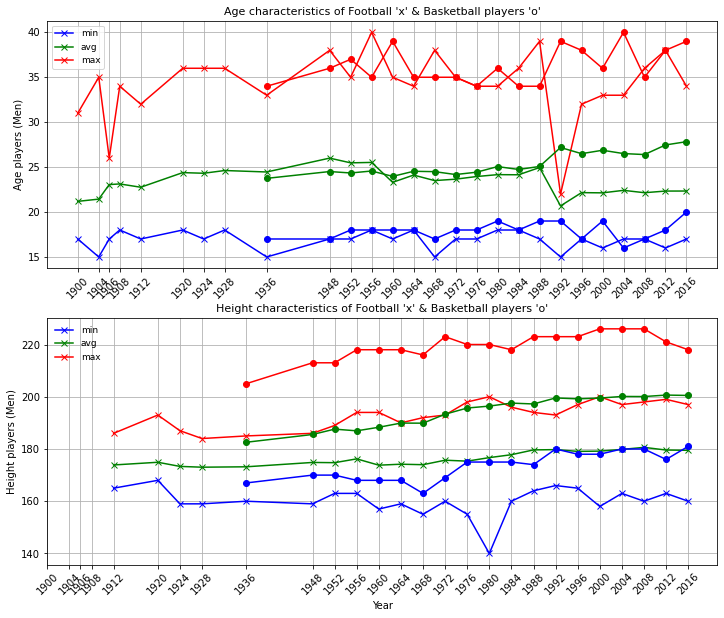

In [66]:
#******************************************Age****************************************
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(F_A.year, F_A['min'], '-x', c='b', label='Min Age - Football');
plt.plot(F_A.year, F_A['avg'], '-x', c='g');
plt.plot(F_A.year, F_A['max'], '-x', c='r');
# plt.plot(F_A.year, F_A['std'], '-x', c='b');
plt.plot(M_A.year, M_A['min'], '-o', c='b', label='Min Age - Basketball');
plt.plot(M_A.year, M_A['avg'], '-o', c='g');
plt.plot(M_A.year, M_A['max'], '-o', c='r');
# plt.plot(M_A.year, M_A['std'], '-x');
plt.ylabel('Age players (Men)', fontsize=10);
plt.title('Age characteristics of Football \'x\' & Basketball players \'o\'', fontsize=11);
plt.legend(['min','avg','max'],loc=0,fontsize=9);
plt.xticks(F_A.year, F_A.year, rotation=45);
plt.grid()


# I will start from the position 4 because the first index have missing values
plt.subplot(2, 1, 2)
plt.plot(F_H.loc[4:,'year'], F_H.loc[4:,'min'], '-x',c='b');
plt.plot(F_H.loc[4:,'year'], F_H.loc[4:,'avg'], '-x',c='g');
plt.plot(F_H.loc[4:,'year'], F_H.loc[4:,'max'], '-x',c='r');
# plt.plot(F_H.loc[4:,'year'], F_H.loc[4:,'std'], '-x');
plt.plot(M_H.year, M_H['min'], '-o', c='b');
plt.plot(M_H.year, M_H['avg'], '-o', c='g');
plt.plot(M_H.year, M_H['max'], '-o', c='r');
# plt.plot(M_H.year, M_H['std'], '-o');
plt.xlabel('Year', fontsize=10);
plt.ylabel('Height players (Men)', fontsize=10);
plt.title('Height characteristics of Football \'x\' & Basketball players \'o\'', fontsize=11);
plt.legend(['min','avg','max'],loc=0,frameon=False,fontsize=9);
plt.xticks(F_H.year, F_H.year, rotation=45);
plt.grid()

## Overall ranking

In [69]:
# Country rank accorduing to number of medals
OverallRanking=pysqldf("""
SELECT Country, SUM(NumberOfmedals) AS Total,
    MAX(CASE WHEN Medal = 'Gold'   THEN NumberOfmedals ELSE 0 END) AS Gold,
    MAX(CASE WHEN Medal = 'Bronze' THEN NumberOfmedals ELSE 0 END) AS Bronze,
    MAX(CASE WHEN Medal = 'Silver' THEN NumberOfmedals ELSE 0 END) AS Silver
  FROM
    (SELECT region AS Country, Medal, count(*) AS NumberOfmedals
       FROM alldata 
       WHERE Medal IS NOT NULL
       GROUP BY region, Medal)
  GROUP BY Country
  ORDER BY Total DESC
 """).head(17)
OverallRanking

,Country,Total,Gold,Bronze,Silver
0,USA,5637,2638,1358,1641
1,Russia,3947,1599,1178,1170
2,Germany,3756,1301,1260,1195
3,UK,2068,678,651,739
4,France,1777,501,666,610
5,Italy,1637,575,531,531
6,Sweden,1536,479,535,522
7,Canada,1352,463,451,438
8,Australia,1349,368,522,459
9,Hungary,1135,432,371,332


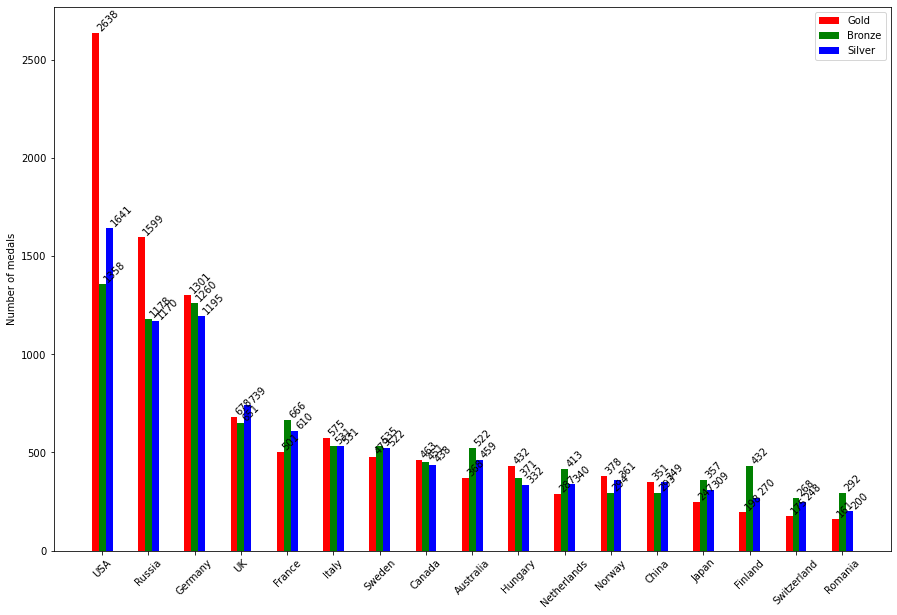

In [106]:
# plt.figure(figsize=(15, 10))
# ax = plt.subplot(111)
# ax.bar(OverallRanking['Country'],OverallRanking['Gold']  , width=0.5, label='Gold', align='center')
# ax.bar(OverallRanking['Country'],OverallRanking['Bronze'], width=0.5, label='Bronze', align='center')
# ax.bar(OverallRanking['Country'],OverallRanking['Silver'], width=0.5, label='Silver', align='center')
# # ax.xaxis_date()
# # plt.ylabel('Country', fontsize=10);
# # plt.xlabel('Number of times', fontsize=10);
# # plt.title('Number of times a country has host Olympic Games', fontsize=10);
# plt.legend();

N = 17
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

yvals = list(OverallRanking['Gold'])
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = list(OverallRanking['Bronze'])
rects2 = ax.bar(ind+width, zvals, width, color='g')

kvals = list(OverallRanking['Silver'])
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Number of medals')
ax.set_xticks(ind+width)
ax.set_xticklabels(tuple(list(OverallRanking['Country'])),rotation=45)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Gold', 'Bronze', 'Silver') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%d'%int(h), ha='left', va='bottom', rotation=45)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

## Question 1:
Is the country known for a sport, the most medal wining?
- Football : What country is most medal-winning? is it Brazil?
- Basketball : What country is most medal-winning? is it the USA?

In [99]:
print(list(data[data['Sport']=='Football']['Event'].unique()))
print(list(data[data['Sport']=='Basketball']['Event'].unique()))
print(list(data[data['Sport']=='Ice Hockey']['Event'].unique()))

["Football Men's Football", "Football Women's Football"]
["Basketball Men's Basketball", "Basketball Women's Basketball"]
["Ice Hockey Men's Ice Hockey", "Ice Hockey Women's Ice Hockey"]


In [189]:
Q1_F_M=alldata[(alldata['Event'] == 'Football Men\'s Football')]
pysqldf("""
SELECT Country, SUM(nbrMedals) AS Total,
    MAX(CASE WHEN Medal = 'Gold'   THEN nbrMedals ELSE 0 END) AS Gold,
    MAX(CASE WHEN Medal = 'Bronze' THEN nbrMedals ELSE 0 END) AS Bronze,
    MAX(CASE WHEN Medal = 'Silver' THEN nbrMedals ELSE 0 END) AS Silver
  FROM
    (SELECT Country, Medal, count(*) AS nbrMedals
        FROM
            (SELECT Year, region AS Country, Medal
              FROM Q1_F_M 
              WHERE Medal IS NOT NULL
              GROUP BY Year, region)
        GROUP BY Country, Medal)
  GROUP BY Country
  ORDER BY Total DESC
 """)

,Country,Total,Gold,Bronze,Silver
0,Germany,6,1,3,2
1,Brazil,6,1,2,3
2,Serbia,5,1,1,3
3,Russia,5,2,3,0
4,Hungary,5,3,1,1
5,Denmark,5,1,1,3
6,UK,4,3,0,1
7,Netherlands,4,0,4,0
8,Argentina,4,2,0,2
9,Sweden,3,1,2,0


In [27]:
Q1_F_W=alldata[(alldata['Event'] == 'Football Women\'s Football')]
pysqldf("""
SELECT Country, SUM(nbrMedals) AS Total,
    MAX(CASE WHEN Medal = 'Gold'   THEN nbrMedals ELSE 0 END) AS Gold,
    MAX(CASE WHEN Medal = 'Bronze' THEN nbrMedals ELSE 0 END) AS Bronze,
    MAX(CASE WHEN Medal = 'Silver' THEN nbrMedals ELSE 0 END) AS Silver
  FROM
    (SELECT Country, Medal, count(*) AS nbrMedals
        FROM
            (SELECT Year, region AS Country, Medal
              FROM Q1_F_W 
              WHERE Medal IS NOT NULL
              GROUP BY Year, region)
        GROUP BY Country, Medal)
  GROUP BY Country
  ORDER BY Total DESC
 """)

,Country,Total,Gold,Bronze,Silver
0,USA,5,4,0,1
1,Germany,4,1,3,0
2,Norway,2,1,1,0
3,Canada,2,0,2,0
4,Brazil,2,0,0,2
5,Sweden,1,0,0,1
6,Japan,1,0,0,1
7,China,1,0,0,1


In [33]:
Q1_B_M=alldata[(alldata['Event'] == 'Basketball Men\'s Basketball')]
pysqldf("""
SELECT Country, SUM(nbrMedals) AS Total,
    MAX(CASE WHEN Medal = 'Gold'   THEN nbrMedals ELSE 0 END) AS Gold,
    MAX(CASE WHEN Medal = 'Bronze' THEN nbrMedals ELSE 0 END) AS Bronze,
    MAX(CASE WHEN Medal = 'Silver' THEN nbrMedals ELSE 0 END) AS Silver
  FROM
    (SELECT Country, Medal, count(*) AS nbrMedals
        FROM
            (SELECT Year, region AS Country, Medal
              FROM Q1_B_M 
              WHERE Medal IS NOT NULL
              GROUP BY Year, region)
        GROUP BY Country, Medal)
  GROUP BY Country
  ORDER BY Total DESC
 """)

,Country,Total,Gold,Bronze,Silver
0,USA,18,15,2,1
1,Russia,10,2,4,4
2,Serbia,7,1,1,5
3,Spain,4,0,1,3
4,Lithuania,3,0,3,0
5,Brazil,3,0,3,0
6,Uruguay,2,0,2,0
7,Italy,2,0,0,2
8,France,2,0,0,2
9,Argentina,2,1,1,0


In [35]:
Q1_B_W=alldata[(alldata['Event'] == 'Basketball Women\'s Basketball')]
pysqldf("""
SELECT Country, SUM(nbrMedals) AS Total,
    MAX(CASE WHEN Medal = 'Gold'   THEN nbrMedals ELSE 0 END) AS Gold,
    MAX(CASE WHEN Medal = 'Bronze' THEN nbrMedals ELSE 0 END) AS Bronze,
    MAX(CASE WHEN Medal = 'Silver' THEN nbrMedals ELSE 0 END) AS Silver
  FROM
    (SELECT Country, Medal, count(*) AS nbrMedals
        FROM
            (SELECT Year, region AS Country, Medal
              FROM Q1_B_W 
              WHERE Medal IS NOT NULL
              GROUP BY Year, region)
        GROUP BY Country, Medal)
  GROUP BY Country
  ORDER BY Total DESC
 """)

,Country,Total,Gold,Bronze,Silver
0,USA,10,8,1,1
1,Russia,6,3,3,0
2,Australia,5,0,2,3
3,Serbia,3,0,2,1
4,China,2,0,1,1
5,Bulgaria,2,0,1,1
6,Brazil,2,0,1,1
7,Spain,1,0,0,1
8,South Korea,1,0,0,1
9,France,1,0,0,1


In [101]:
Q1_M_H=alldata[(alldata['Event'] == 'Ice Hockey Men\'s Ice Hockey')]
pysqldf("""
SELECT Country, SUM(nbrMedals) AS Total,
    MAX(CASE WHEN Medal = 'Gold'   THEN nbrMedals ELSE 0 END) AS Gold,
    MAX(CASE WHEN Medal = 'Bronze' THEN nbrMedals ELSE 0 END) AS Bronze,
    MAX(CASE WHEN Medal = 'Silver' THEN nbrMedals ELSE 0 END) AS Silver
  FROM
    (SELECT Country, Medal, count(*) AS nbrMedals
        FROM
            (SELECT Year, region AS Country, Medal
              FROM Q1_M_H 
              WHERE Medal IS NOT NULL
              GROUP BY Year, region)
        GROUP BY Country, Medal)
  GROUP BY Country
  ORDER BY Total DESC
 """)

,Country,Total,Gold,Bronze,Silver
0,Canada,15,9,2,4
1,Russia,12,8,2,2
2,USA,11,2,1,8
3,Czech Republic,10,1,5,4
4,Sweden,9,2,4,3
5,Finland,6,0,4,2
6,UK,2,1,1,0
7,Switzerland,2,0,2,0
8,Germany,2,0,2,0


In [102]:
Q1_F_H=alldata[(alldata['Event'] == 'Ice Hockey Women\'s Ice Hockey')]
pysqldf("""
SELECT Country, SUM(nbrMedals) AS Total,
    MAX(CASE WHEN Medal = 'Gold'   THEN nbrMedals ELSE 0 END) AS Gold,
    MAX(CASE WHEN Medal = 'Bronze' THEN nbrMedals ELSE 0 END) AS Bronze,
    MAX(CASE WHEN Medal = 'Silver' THEN nbrMedals ELSE 0 END) AS Silver
  FROM
    (SELECT Country, Medal, count(*) AS nbrMedals
        FROM
            (SELECT Year, region AS Country, Medal
              FROM Q1_F_H 
              WHERE Medal IS NOT NULL
              GROUP BY Year, region)
        GROUP BY Country, Medal)
  GROUP BY Country
  ORDER BY Total DESC
 """)

,Country,Total,Gold,Bronze,Silver
0,USA,5,1,1,3
1,Canada,5,4,0,1
2,Sweden,2,0,1,1
3,Finland,2,0,2,0
4,Switzerland,1,0,1,0


## Question2 :
Is there any relation between organizing the Olympic and being the country most medal-wining?

In [145]:
yearRank=pysqldf("""
SELECT Year, City,`Host country`, Season,
    MAX(CASE WHEN Rank = 1 THEN Country ELSE 0 END) AS '1st',
    MAX(CASE WHEN Rank = 2 THEN Country ELSE 0 END) AS '2d',
    MAX(CASE WHEN Rank = 3 THEN Country ELSE 0 END) AS '3d',
    MAX(CASE WHEN Rank = 4 THEN Country ELSE 0 END) AS '4th',
    MAX(CASE WHEN Rank = 5 THEN Country ELSE 0 END) AS '5th'
    FROM 
    (
    SELECT Year, City, `Host country`, Season, region AS Country, count(*) as nbrOfMedals,
      ROW_NUMBER() OVER (PARTITION BY Year, `Host country`, Season ORDER BY count(*) DESC) as Rank
      FROM alldata_
      WHERE Medal IS NOT NULL
      GROUP BY Year, `Host country`, Season, region
      ORDER BY Year, City, nbrOfMedals DESC
    )
    WHERE Rank BETWEEN 1 AND 5
    GROUP BY Year, City, `Host country`, Season
    ORDER BY Year
 """)

In [146]:
yearRank

,Year,City,Host country,Season,1st,2d,3d,4th,5th
0,1896,Athina,Greece,Summer,Greece,Germany,USA,France,UK
1,1900,Paris,France,Summer,France,UK,USA,Germany,Belgium
2,1904,St. Louis,USA,Summer,USA,Canada,Germany,Cuba,Hungary
3,1906,Athina,Greece,Summer,Greece,France,Italy,UK,Denmark
4,1908,London,UK,Summer,UK,Sweden,USA,Canada,Norway
5,1912,Stockholm,Sweden,Summer,Sweden,UK,USA,Denmark,Norway
6,1920,Antwerpen,Belgium,Summer,USA,Belgium,Sweden,France,Norway
7,1924,Chamonix,France,Winter,UK,Norway,Finland,USA,France
8,1924,Paris,France,Summer,USA,France,Sweden,UK,Switzerland
9,1928,Amsterdam,Netherlands,Summer,USA,Germany,Italy,UK,Netherlands


In [154]:
df=pysqldf("""
     SELECT *, 
       (CASE WHEN (`Host country` IN (`1st`,`2d`,`3d`,`4th`,`5th`)) then 1 ELSE 0 END) AS 'Yes/No'
       FROM yearRank
""")
df.sort_values('Season')

,Year,City,Host country,Season,1st,2d,3d,4th,5th,Yes/No
0,1896,Athina,Greece,Summer,Greece,Germany,USA,France,UK,1
21,1956,Stockholm,Sweden,Summer,Germany,UK,Sweden,Italy,Switzerland,1
22,1960,Roma,Italy,Summer,Russia,USA,Germany,Italy,Hungary,1
27,1968,Mexico City,Mexico,Summer,Russia,USA,Germany,Hungary,Japan,0
28,1972,Munich,Germany,Summer,Germany,Russia,USA,Hungary,Japan,1
31,1976,Montreal,Canada,Summer,Russia,Germany,USA,Poland,Romania,0
33,1980,Moskva,Russia,Summer,Russia,Germany,Bulgaria,Romania,Hungary,1
20,1956,Melbourne,Australia,Summer,Russia,USA,Australia,Hungary,Italy,1
34,1984,Los Angeles,USA,Summer,USA,Germany,Romania,Serbia,Canada,1
39,1992,Barcelona,Spain,Summer,USA,Russia,Germany,China,Spain,1


In [152]:
print(f"percentage for Summer : {sum(df[df['Season']=='Summer']['Yes/No'])/len(df[df['Season']=='Summer'])*100}")
print(f"percentage for Summer : {sum(df[df['Season']=='Winter']['Yes/No'])/len(df[df['Season']=='Winter'])*100}")
print(f"percentage for Summer : {sum(df['Yes/No'])/len(df)*100}")

80.0
54.54545454545454
69.23076923076923


## Question 3
Does the age of the competitor affect the result?
I'll see the corelation between the gold winner Age and the Mean of all competitors in the event

In [184]:
# I neglect the records where age is missing
Q3=pysqldf("""
    SELECT Year, City, `Host country`, Season, Sport, Event,
          MAX(CASE WHEN Medal = 'Gold' THEN AgeGold ELSE 0 END) AS 'Winner gold age',
          AVG(AgeGold) AS 'Competitors avg age'
      FROM 
      (
        SELECT Year, City, `Host country`, Season, Sport, Event, Medal, AVG(Age) AS AgeGold
          FROM alldata_
          WHERE Age IS NOT NULL
          GROUP BY Year, city, `Host country`, Season, Sport, Event, Medal
          ORDER BY Year
      )
      GROUP BY Year, city, `Host country`, Season, Sport, Event
      ORDER BY Year
 """)

In [185]:
Q3

,Year,City,Host country,Season,Sport,Event,Winner gold age,Competitors avg age
0,1896,Athina,Greece,Summer,Athletics,"Athletics Men's 1,500 metres",22.0,21.916667
1,1896,Athina,Greece,Summer,Athletics,Athletics Men's 100 metres,21.0,22.696429
2,1896,Athina,Greece,Summer,Athletics,Athletics Men's 110 metres Hurdles,23.0,22.500000
3,1896,Athina,Greece,Summer,Athletics,Athletics Men's 400 metres,21.0,21.833333
4,1896,Athina,Greece,Summer,Athletics,Athletics Men's 800 metres,22.0,21.500000
...,...,...,...,...,...,...,...,...
6178,2016,Rio de Janeiro,Brazil,Summer,Wrestling,"Wrestling Women's Flyweight, Freestyle",22.0,24.285714
6179,2016,Rio de Janeiro,Brazil,Summer,Wrestling,"Wrestling Women's Heavyweight, Freestyle",27.0,29.464286
6180,2016,Rio de Janeiro,Brazil,Summer,Wrestling,"Wrestling Women's Light-Heavyweight, Freestyle",21.0,24.321429
6181,2016,Rio de Janeiro,Brazil,Summer,Wrestling,"Wrestling Women's Lightweight, Freestyle",32.0,26.515625


In [187]:
print(f"the pearson correlation : {pearsonr(Q3['Winner gold age'],Q3['Competitors avg age'])}")

(0.6030046440571757, 0.0)


## Question 4 :
### Is the number of athletes sent by a country related to the number of Gold Medals?

In [111]:
Year_Participants_Medal = pysqldf("""
SELECT t1.Year, t1.Season, t1.Country, `Total participation`, `Number of distinct athletes`, Gold, Bronze, Silver, None
 FROM
 (SELECT Year, Season, region AS Country, COUNT(Distinct ID) AS `Number of distinct athletes`
   FROM alldata_
   GROUP BY Year, region, Season
   ORDER BY COUNT(Distinct ID) DESC) as t1 
 LEFT JOIN 
  (SELECT Year, Season, Country, SUM(NumberOfmedals) AS `Total participation`,
        MAX(CASE WHEN Medal = 'Gold'   THEN NumberOfmedals ELSE 0 END) AS Gold,
        MAX(CASE WHEN Medal = 'Bronze' THEN NumberOfmedals ELSE 0 END) AS Bronze,
        MAX(CASE WHEN Medal = 'Silver' THEN NumberOfmedals ELSE 0 END) AS Silver,
        MAX(CASE WHEN Medal IS NULL    THEN NumberOfmedals ELSE 0 END) AS None        
      FROM
        (SELECT Year, Season, region AS Country, Medal, COUNT(*) AS NumberOfmedals
           FROM alldata_
           GROUP BY Year, region, Season, Medal) 
      GROUP BY Year, Country, Season
      ORDER BY SUM(NumberOfmedals) DESC) t2  
 ON  t1.Year = t2.Year AND t1.Country = t2.Country AND t1.Season = t2.Season
""")

In [114]:
Year_Participants_Medal.head(25)

,Year,Season,Country,Total participation,Number of distinct athletes,Gold,Bronze,Silver,None
0,1908,Summer,UK,972,735,147,90,131,604
1,1972,Summer,Germany,1041,721,74,96,83,788
2,1900,Summer,France,1071,720,52,82,101,836
3,1996,Summer,USA,839,648,159,52,48,580
4,2008,Summer,China,777,633,74,57,53,593
5,2000,Summer,Australia,788,617,60,54,69,605
6,1988,Summer,Germany,918,606,111,94,91,622
7,2008,Summer,USA,763,588,127,80,110,446
8,2000,Summer,USA,764,586,130,51,61,522
9,1976,Summer,Germany,859,557,123,74,76,586


In [135]:
Year_Participants_Medal['Total Medals']= Year_Participants_Medal[['Gold','Bronze','Silver']].sum(axis=1)

In [171]:
Year_Participants_Medal_s=Year_Participants_Medal[Year_Participants_Medal['Season']=='Summer'].sort_values('Year')
Year_Participants_Medal_w=Year_Participants_Medal[Year_Participants_Medal['Season']=='Winter'].sort_values('Year')

USA_s=Year_Participants_Medal[(Year_Participants_Medal['Country']=='USA') 
                        & (Year_Participants_Medal['Season']=='Summer')].sort_values('Year')
USA_w=Year_Participants_Medal[(Year_Participants_Medal['Country']=='USA') 
                        & (Year_Participants_Medal['Season']=='Winter')].sort_values('Year')
France_s=Year_Participants_Medal[(Year_Participants_Medal['Country']=='France') 
                        & (Year_Participants_Medal['Season']=='Summer')].sort_values('Year')
France_w=Year_Participants_Medal[(Year_Participants_Medal['Country']=='France') 
                        & (Year_Participants_Medal['Season']=='Winter')].sort_values('Year')

In [173]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(f"""The pearson correlation between the Number of distinct athletes and the number of gold medals:\n
       -All Summer's Season data: {pearsonr(Year_Participants_Medal_s['Number of distinct athletes']
                                            ,Year_Participants_Medal_s['Gold'])}
       -All Winter's Season data: {pearsonr(Year_Participants_Medal_w['Number of distinct athletes']
                                            ,Year_Participants_Medal_w['Gold'])}
       
       -for USA in Summer's Season: {pearsonr(USA_s['Number of distinct athletes'],USA_s['Gold'])}
       -for USA in winter's Season: {pearsonr(USA_w['Number of distinct athletes'],USA_w['Gold'])}
       -for France in Summer's Season : {pearsonr(France_s['Number of distinct athletes'],France_s['Gold'])}
       -for France in winter's Season: {pearsonr(France_w['Number of distinct athletes'],France_w['Gold'])}
      """)

The pearson correlation between the Number of distinct athletes and the number of gold medals:

       -All Summer's Season data: (0.7494358949127844, 0.0)
       -All Winter's Season data: (0.6275118117588578, 1.9427884162486226e-112)
       
       -for USA in Summer's Season: (0.8446883438890789, 1.5856210123563883e-08)
       -for USA in winter's Season: (0.385038638767634, 0.07680623143865707)
       -for France in Summer's Season : (0.7067980802235567, 1.820535321193698e-05)
       -for France in winter's Season: (0.6120805763592412, 0.0024654333057815446)
      


## Classification of contries in Sports

In [217]:
year_country_sport=pysqldf("""
   SELECT  t1.Year, t1.Season, t1.Country, t1.Sport, NumberOfEvents, NumberOfAthletes, `Total participation`,
   Gold, Bronze, Silver, None
   FROM
    (SELECT Year, Season, region AS Country, Sport
           , COUNT(Distinct Event) AS NumberOfEvents
           , COUNT(Distinct ID) AS NumberOfAthletes
           FROM alldata_
           GROUP BY Year, region, Season, Sport
           ORDER BY Year) AS t1
    JOIN        
    (SELECT Year, Season, Country, Sport, SUM(NumberOfmedals) AS `Total participation`,
        MAX(CASE WHEN Medal = 'Gold'   THEN NumberOfmedals ELSE 0 END) AS Gold,
        MAX(CASE WHEN Medal = 'Bronze' THEN NumberOfmedals ELSE 0 END) AS Bronze,
        MAX(CASE WHEN Medal = 'Silver' THEN NumberOfmedals ELSE 0 END) AS Silver,
        MAX(CASE WHEN Medal IS NULL    THEN NumberOfmedals ELSE 0 END) AS None        
      FROM
          (SELECT Year, Season, region AS Country, Sport, Medal, COUNT(*) AS NumberOfmedals
           FROM alldata_
           GROUP BY Year, region, Season, Sport, Medal) 
      GROUP BY Year, Country, Season, Sport
      ORDER BY Year) AS t2
      
    ON t1.Year=t2.Year AND t1.Season=t2.Season AND t1.Country=t2.Country AND t1.Sport=t2.Sport
        """)


In [218]:
b

,Year,Season,Country,Sport,NumberOfEvents,Athletes
0,1896,Summer,Australia,Athletics,3,1
1,1896,Summer,Australia,Tennis,2,1
2,1896,Summer,Austria,Cycling,4,1
3,1896,Summer,Austria,Fencing,1,1
4,1896,Summer,Austria,Swimming,3,2
...,...,...,...,...,...,...
26555,2016,Summer,Zimbabwe,Equestrianism,1,1
26556,2016,Summer,Zimbabwe,Football,1,17
26557,2016,Summer,Zimbabwe,Rowing,2,2
26558,2016,Summer,Zimbabwe,Shooting,1,1


In [213]:
b[(b['Sport']=='Sailing')&(b['Year']==2016)]

,Year,Season,Country,Sport,NumberOfEvents,Athletes
24696,2016,Summer,Algeria,Sailing,3,3
24712,2016,Summer,Angola,Sailing,2,3
24734,2016,Summer,Argentina,Sailing,9,13
24752,2016,Summer,Aruba,Sailing,2,3
24774,2016,Summer,Australia,Sailing,7,11
...,...,...,...,...,...,...
26437,2016,Summer,USA,Sailing,10,15
26467,2016,Summer,Ukraine,Sailing,2,3
26487,2016,Summer,Uruguay,Sailing,3,4
26523,2016,Summer,Venezuela,Sailing,2,2


In [175]:
a=pysqldf("""
    SELECT Year, Season, Country, Sport, SUM(NumberOfmedals) AS `Total participation`,
        MAX(CASE WHEN Medal = 'Gold'   THEN NumberOfmedals ELSE 0 END) AS Gold,
        MAX(CASE WHEN Medal = 'Bronze' THEN NumberOfmedals ELSE 0 END) AS Bronze,
        MAX(CASE WHEN Medal = 'Silver' THEN NumberOfmedals ELSE 0 END) AS Silver,
        MAX(CASE WHEN Medal IS NULL    THEN NumberOfmedals ELSE 0 END) AS None        
      FROM
          (SELECT Year, Season, region AS Country, Sport, Medal, COUNT(*) AS NumberOfmedals
           FROM alldata_
           GROUP BY Year, region, Season, Sport, Medal) 
      GROUP BY Year, Country, Season, Sport
      ORDER BY Year
        """)

In [209]:
a[(a['Sport']=='Sailing')&(a['Year']==2016)]

,Year,Season,Country,Sport,Total participation,Gold,Bronze,Silver,None
5295,2016,Summer,Brazil,Sailing,15,2,0,0,13
5300,2016,Summer,France,Sailing,15,1,3,0,11
5311,2016,Summer,UK,Sailing,15,3,0,1,11
5312,2016,Summer,USA,Sailing,15,0,1,0,14
5877,2016,Summer,Spain,Sailing,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
26363,2016,Summer,Montenegro,Sailing,1,0,0,0,1
26449,2016,Summer,Saint Lucia,Sailing,1,0,0,0,1
26502,2016,Summer,Taiwan,Sailing,1,0,0,0,1
26515,2016,Summer,Trinidad,Sailing,1,0,0,0,1
